In [1]:
from neural_implementation import neural_classification as nc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 150
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [4]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

df_short = df[df['variety'] != 'Setosa']
print(df_short)

     sepal.length  sepal.width  petal.length  petal.width     variety
50            7.0          3.2           4.7          1.4  Versicolor
51            6.4          3.2           4.5          1.5  Versicolor
52            6.9          3.1           4.9          1.5  Versicolor
53            5.5          2.3           4.0          1.3  Versicolor
54            6.5          2.8           4.6          1.5  Versicolor
55            5.7          2.8           4.5          1.3  Versicolor
56            6.3          3.3           4.7          1.6  Versicolor
57            4.9          2.4           3.3          1.0  Versicolor
58            6.6          2.9           4.6          1.3  Versicolor
59            5.2          2.7           3.9          1.4  Versicolor
60            5.0          2.0           3.5          1.0  Versicolor
61            5.9          3.0           4.2          1.5  Versicolor
62            6.0          2.2           4.0          1.0  Versicolor
63            6.1   

In [5]:
N = df_short.shape[0]
print(f'Velicina skupa podataka: {N}')

X = np.ones((N, m + 1))
X[:, 1] = df_short[attr1]
X[:, 2] = df_short[attr2]

y = df_short['variety']

Velicina skupa podataka: 100


In [6]:
classes = df_short['variety'].unique()
n_classes = len(classes)

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Mapiranje imena klasa u numericke vrednosti:
Versicolor -> 0
Virginica -> 1

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Versicolor
1 -> Virginica


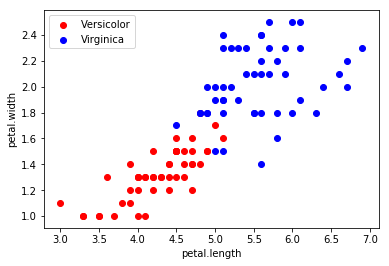

In [7]:
colors = ['red', 'blue']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [8]:
y = y.replace(name_to_class_dict)
y = np.array(y).reshape(-1, 1)

In [10]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]]
 ...
Ciljne promenljive:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
 ...


In [11]:
# nn = NeuralNetwork(m, [3, 4], 1)
nn = nc.NeuralNetwork(m, [3*m], 1)
nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 6 x 3
1 -> 2: 1 x 7

Model:
W_0: 0 -> 1
[[-0.38914917  0.90260446 -0.01806322]
 [ 0.72366136 -0.44582302 -0.02298874]
 [ 0.82303039 -0.59972897  0.6814158 ]
 [ 0.95408214  0.31466372 -0.15240203]
 [-0.98562011  0.83518816  0.04269466]
 [-0.25615281 -0.43507762  0.45114591]]
W_1: 1 -> 2
[[-1.84975863e-01 -9.70822484e-01 -8.66567916e-02  7.90363409e-01
   6.78963967e-04 -2.65761496e-01 -7.36366735e-01]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=7)

In [13]:
print(f'X_train:')
print(X_train)
print()

print(f'y_train:')
print(y_train)
print()

print(f'X_test:')
print(X_test)
print()

print(f'y_test:')
print(y_test)

X_train:
[[1.  4.9 1.5]
 [1.  5.8 1.6]
 [1.  4.5 1.5]
 [1.  3.9 1.2]
 [1.  4.1 1. ]
 [1.  4.4 1.2]
 [1.  5.5 2.1]
 [1.  3.5 1. ]
 [1.  4.9 1.5]
 [1.  5.3 2.3]
 [1.  5.8 2.2]
 [1.  5.3 1.9]
 [1.  5.1 1.6]
 [1.  3.9 1.4]
 [1.  4.3 1.3]
 [1.  4.1 1.3]
 [1.  4.4 1.4]
 [1.  4.5 1.7]
 [1.  4.2 1.3]
 [1.  3.7 1. ]
 [1.  6.7 2. ]
 [1.  3.8 1.1]
 [1.  6.7 2.2]
 [1.  4.2 1.2]
 [1.  4.7 1.4]
 [1.  4.2 1.5]
 [1.  4.4 1.3]
 [1.  6.1 2.5]
 [1.  4.7 1.5]
 [1.  5.9 2.1]
 [1.  5.  1.9]
 [1.  5.7 2.1]
 [1.  6.  1.8]
 [1.  5.  2. ]
 [1.  5.  1.5]
 [1.  4.9 1.8]
 [1.  5.5 1.8]
 [1.  6.9 2.3]
 [1.  6.4 2. ]
 [1.  3.3 1. ]
 [1.  4.  1.3]
 [1.  4.7 1.4]
 [1.  4.5 1.3]
 [1.  6.6 2.1]
 [1.  5.1 2.4]
 [1.  5.8 1.8]
 [1.  5.6 2.4]
 [1.  5.  1.7]
 [1.  5.2 2.3]
 [1.  4.8 1.8]
 [1.  4.6 1.4]
 [1.  4.8 1.8]
 [1.  4.  1. ]
 [1.  4.8 1.8]
 [1.  4.5 1.5]
 [1.  4.5 1.5]
 [1.  5.6 1.4]
 [1.  5.5 1.8]
 [1.  5.6 1.8]
 [1.  3.5 1. ]
 [1.  5.4 2.1]
 [1.  4.5 1.6]
 [1.  5.1 1.9]
 [1.  4.5 1.5]
 [1.  4.7 1.6]
 [1.  4.  1.2]
 

In [15]:
print('Testiranje backrpopagation algoritma:\n')
loss, gradient = nn.backpropagation(X_train[0].reshape(1, -1), y_train[0].reshape(1, -1))
grad_approx = nc.gradient_checking(X_train[0].reshape(1, -1), y_train[0].reshape(1, -1), nn.model)

diff = abs(gradient - grad_approx)
print('|gradient - grad_approx|:')
print(diff)

Testiranje backrpopagation algoritma:

|gradient - grad_approx|:
[5.57646724e-10 6.56129378e-08 1.88234875e-09 3.76962216e-11
 4.44170902e-09 1.27390439e-10 2.99681759e-10 3.52580229e-08
 1.01142039e-09 1.01244413e-12 1.16613330e-10 3.32277861e-12
 2.84647688e-10 3.34883473e-08 9.60648801e-10 2.33318812e-10
 2.74486339e-08 7.87447725e-10 1.60371889e-08 1.51926283e-08
 9.84002532e-11 2.53535394e-10 1.19318445e-08 1.41763885e-08
 5.73673539e-11]


In [16]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(8)]

print('lamda parameters:')
for i, lambda_param in enumerate(lambdas):
    print(f'lambda_{i} = {lambda_param}')

lamda parameters:
lambda_0 = 0
lambda_1 = 0.01
lambda_2 = 0.015
lambda_3 = 0.0225
lambda_4 = 0.03375
lambda_5 = 0.050625
lambda_6 = 0.0759375
lambda_7 = 0.11390625
lambda_8 = 0.170859375


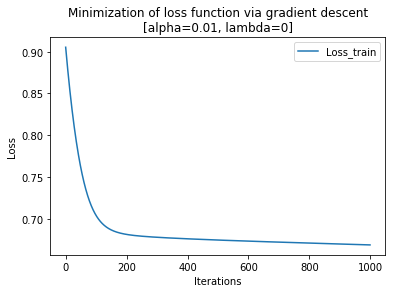

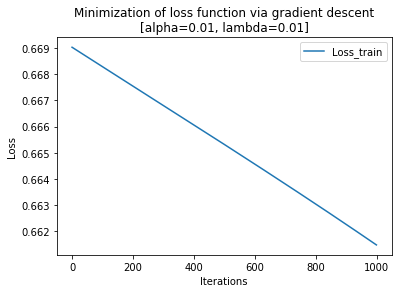

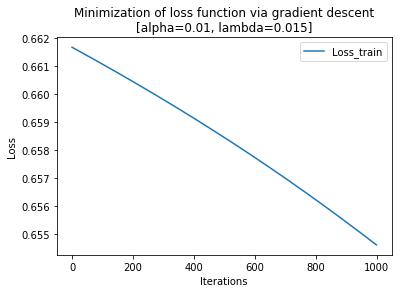

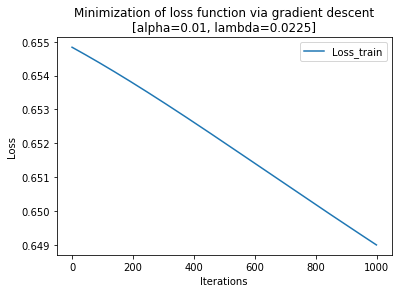

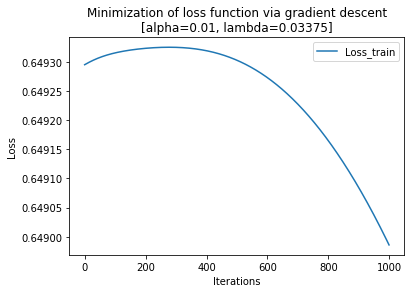

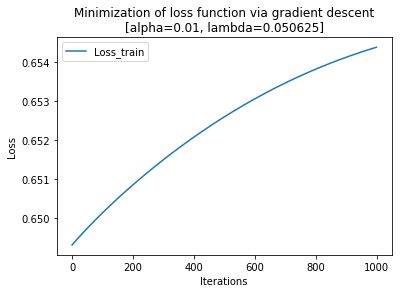

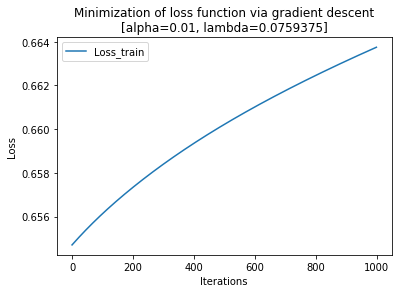

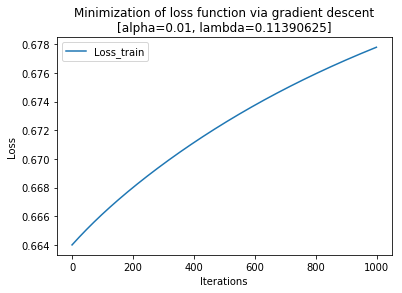

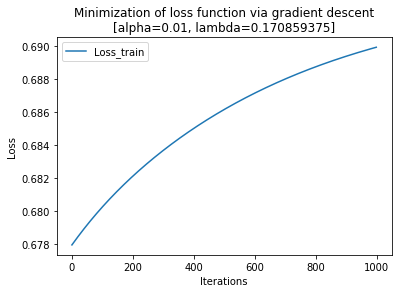

In [17]:
classifiers = [nn.fit(X_train, y_train, alpha=0.01, num_iter=1000, 
                      lambda_param=lambda_param, plot=True) for lambda_param in lambdas]

In [18]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i, loss in enumerate(losses_test):
    print(f'Klasifikator {i}: loss_{i} = {loss}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 0: loss_0 = 0.6647386268479227
Klasifikator 1: loss_1 = 0.6567488292691259
Klasifikator 2: loss_2 = 0.6490351955496974
Klasifikator 3: loss_3 = 0.6430863054599347
Klasifikator 4: loss_4 = 0.6433200149583967
Klasifikator 5: loss_5 = 0.6494953669333788
Klasifikator 6: loss_6 = 0.6604046328770947
Klasifikator 7: loss_7 = 0.6762553156482846
Klasifikator 8: loss_8 = 0.6895899644094097


In [19]:
min_loss = float('inf')
best_clf = None
best_lambda = None

for i in range(len(losses_test)):
    if losses_test[i] < min_loss:
        min_loss = losses_test[i]
        best_clf = classifiers[i]
        best_lambda = lambdas[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}\n')
print(f'Model najboljeg klasifikatora:')

best_clf.print_model()
print()

print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: {best_lambda}')
print(f'Najbolji lambda preko klasifikatora:: {best_clf.lambda_learned}')

Najmanji gubitak (na test skupu) za svaki klasifikator: 0.6430863054599347

Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[-0.28731284  0.82379013  0.05793227]
 [ 0.91661677 -0.30424007 -0.16457264]
 [ 0.55121353 -0.07427031  0.72503357]
 [ 0.91124458  0.21281946 -0.05649714]
 [-1.03581784  0.4265671   0.01839112]
 [-0.02739511 -0.31606428  0.09001232]]
W_1: 1 -> 2
[[-0.16226557 -0.49267999 -0.7122553   0.80885896  0.18080663  0.29892175
  -0.76496083]]

Regularizacioni parametar lambda za koji je naucen najbolji model: 0.0225
Najbolji lambda preko klasifikatora:: 0.0225


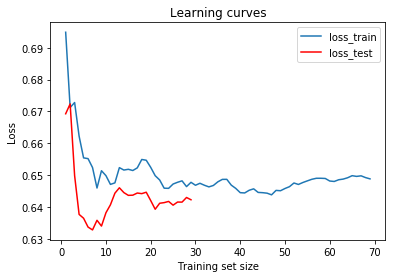

In [20]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

Ponovno iscrtavanje skupa podataka:


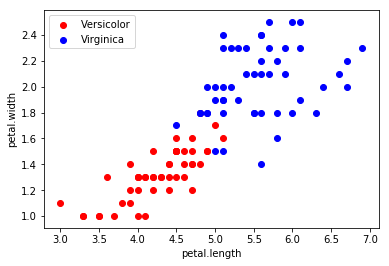

In [21]:
print('Ponovno iscrtavanje skupa podataka:')
colors = ['red', 'blue']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [28]:
petal_length = float(input('Unesite petal.length:'))
petal_width = float(input('Unesite petal.width:'))

x = np.array([1, petal_length, petal_width])
print(x)

[1.  5.5 2. ]


In [29]:
y_predict = best_clf.predict(x)
print(y_predict)

if y_predict < 0.5:
    print(class_to_name_dict[0])
else:
    print(class_to_name_dict[1])

0.5273552458167009
Virginica
